In [46]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import trange, tqdm
tqdm.pandas()

In [47]:
metrics = pd.read_excel('../data/working_dir/metrics_comparison.xlsx', )
metrics.columns = pd.Series(metrics.columns).apply(lambda el: f"${el}$")
metrics

,$models$,$mean\_F_1$,$Accuracy$,$BertScore\_F_1$,$chrF++$,$Jaccard\_measure$
0,YaGPT Lite,0.432540,0.474747,0.674222,36.345512,0.157380
1,YaGPT Pro,0.654752,0.676768,0.758793,51.026090,0.320395
2,YaGPT Pro (finetuned),0.765099,0.777778,0.771409,47.824562,0.374862
3,Saiga Mistral,0.518173,0.525253,0.693550,35.487165,0.189184
4,Saiga Llama3-F16,0.667317,0.686869,0.719104,45.070653,0.267669
5,Saiga Llama3-Q8-0,0.667317,0.686869,0.729687,46.977054,0.280999
6,Saiga Llama3-Q4-K,0.491741,0.535354,0.729384,45.902858,0.286635
7,Saiga Llama3-Q2-K,0.319023,0.414141,0.569425,10.211421,0.032787


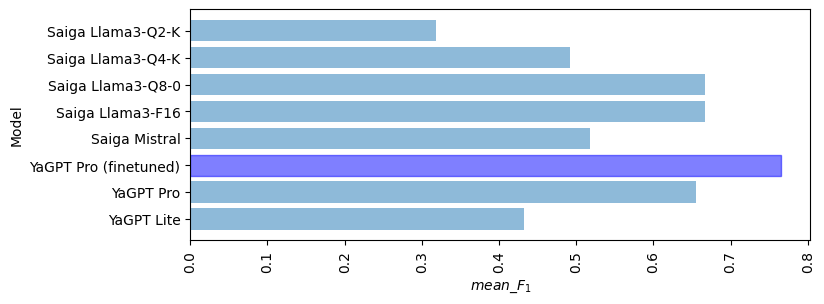

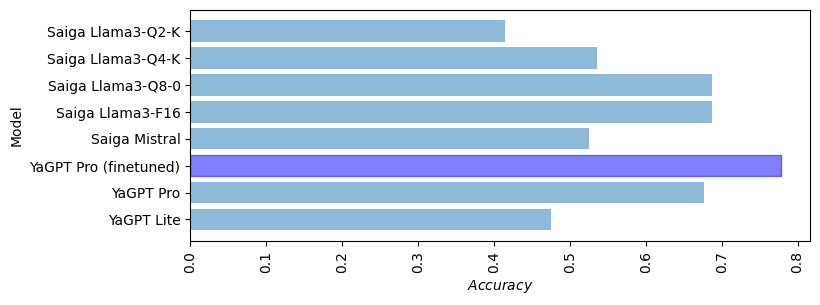

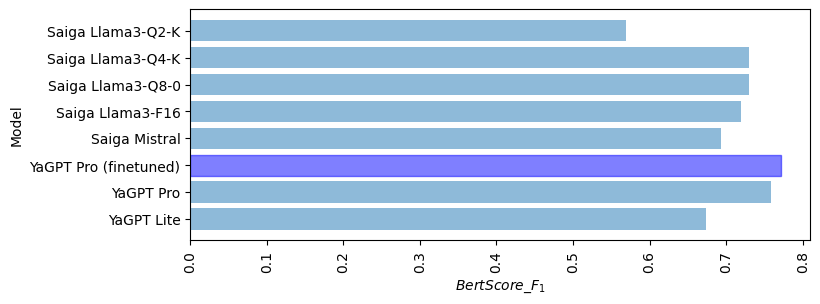

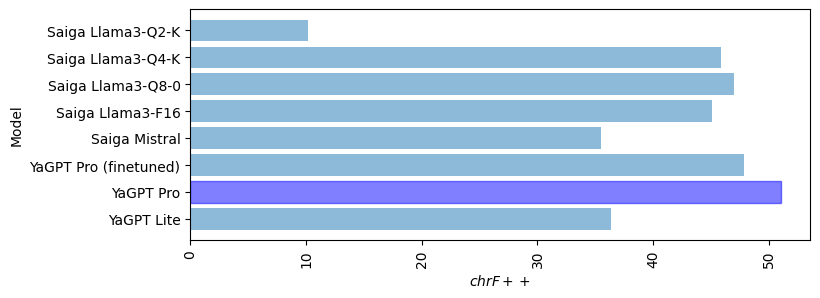

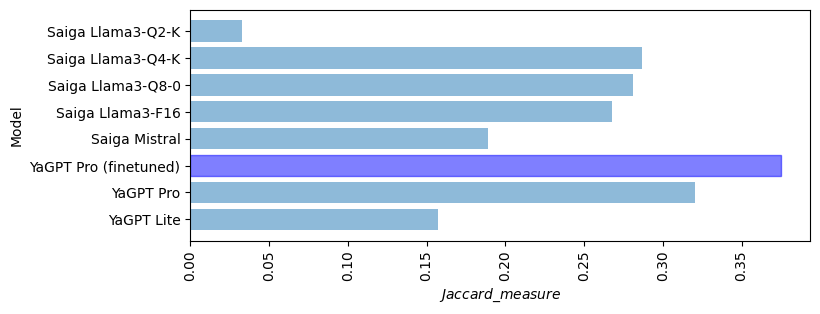

In [61]:
for metric in metrics.columns[1:]:
    plt.figure(figsize=(8, 3))
    ax = plt.barh(y=metrics['$models$'], width=metrics[metric], alpha=0.5)
    ax.patches[metrics[metric].argmax()].set_color('blue')
    
    plt.ylabel('Model')
    plt.xlabel(metric)
    plt.xticks(rotation=90, horizontalalignment='center')
    metric = metric[1:-1].replace('\\', '')
    plt.savefig(f'../data/models_metrics_{metric}.png', bbox_inches='tight', dpi=400)
    plt.show()
